# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "../data/train.p"
validation_file= "../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# verfiy that the number of images in each set matches the number of labels in the same set
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
unique, counts = np.unique(y_train, return_counts=True)
n_classes = len(unique)
print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

31


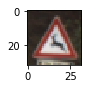

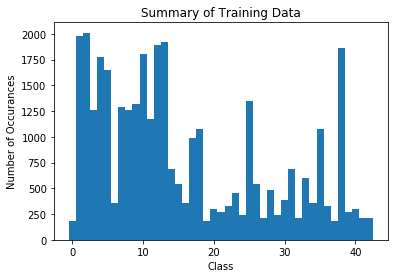

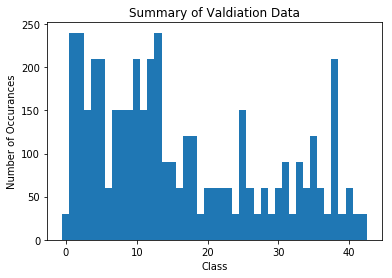

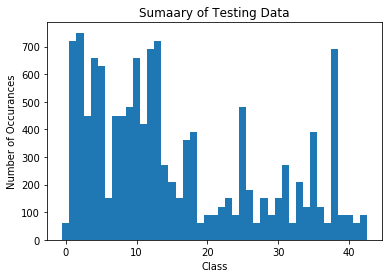

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# select a random image from training data 
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

# se matplotlib to visualize the image and print its label and see if the image and the label matches
print(y_train[index])
plt.figure(figsize=(1,1))
plt.imshow(image)
plt.show()

### Summary of training data
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts, 1)
plt.title('Summary of Training Data')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

### Summary of validation data
unique, counts = np.unique(y_valid, return_counts=True)
plt.bar(unique, counts, 1)
plt.title('Summary of Valdiation Data')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

### Summary of test data
unique, counts = np.unique(y_test, return_counts=True)
plt.bar(unique, counts, 1)
plt.title('Sumaary of Testing Data')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [ ]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

In [4]:
# convert color images into grayscale images
import cv2
def color_2_grayscale(image_data):
    gray_image_data = np.zeros(image_data.shape[:-1])
    #gray_image_data = np.zeros([len(image_data), image_data[0].shape[0], image_data[0].shape[1], 1])
    for i in range(len(image_data)):
        gray_image_data[i] = cv2.cvtColor(image_data[i],cv2.COLOR_RGB2GRAY)
    gray_image_data =  np.float32(gray_image_data)
    gray_image_data = gray_image_data.reshape(len(image_data),image_data[0].shape[0], image_data[0].shape[1], 1)
    return gray_image_data

X_train = color_2_grayscale(X_train)
X_valid = color_2_grayscale(X_valid)
X_test = color_2_grayscale(X_test)
print(X_train.shape)

(34799, 32, 32, 1)


In [5]:
# normalize grayscale images between [-1, 1], to have 0 mean and unit standard deviation
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [-1, 1]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    img_min = 0
    img_max = 255
    new_min = -1
    new_max = 1
    x1 = (image_data - img_min) / (img_max - img_min)
    x2 = x1 * (new_max - new_min)
    x2 = x2 + new_min
    return x2

X_train = normalize_grayscale(X_train)
X_valid = normalize_grayscale(X_valid)
X_test = normalize_grayscale(X_test)
#print(X_train.dtype) # uncomment to check data type of image
print(X_train.shape)

(34799, 32, 32, 1)


### Model Architecture

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [14]:
import tensorflow as tf
EPOCHS = 100
BATCH_SIZE = 128
rate = 0.0005

In [15]:
# define weight and biases for LeNet
# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0 # mean of weights
sigma = 0.1 # standard deviation of weights

weights = { 
    'wc1': tf.Variable(tf.truncated_normal([5, 5, 1, 16], mu, sigma)), # [height, width, input_depth, output_depth]
    'wc2': tf.Variable(tf.truncated_normal([5, 5, 16, 32], mu, sigma)), # [height, width, input_depth, output_depth]
    'wd1': tf.Variable(tf.truncated_normal([5*5*32, 120], mu, sigma)), # [input_features, output_features]
    'wd2': tf.Variable(tf.truncated_normal([120, 84], mu, sigma)), # [input_features, output_classes]
    'wd3': tf.Variable(tf.truncated_normal([84, n_classes], mu, sigma))} # [input_features, output_classes]

biases = {
    'bc1': tf.Variable(tf.truncated_normal([16], mu, sigma)), # depth of convolution
    'bc2': tf.Variable(tf.truncated_normal([32], mu, sigma)), # depth of convolution
    'bd1': tf.Variable(tf.truncated_normal([120], mu, sigma)), # number of output features in fully connected layer
    'bd2': tf.Variable(tf.truncated_normal([84], mu, sigma)), # number of classes in output layer
    'bd3': tf.Variable(tf.truncated_normal([n_classes], mu, sigma))} # number of classes in output layer


In [16]:
# define Tensor Variables
# x stores our images
x = tf.placeholder(tf.float32, (None, 32, 32, 1)) # placeholder that will store our input batches
# here we take batch =  None, which allows the placeholder to later accept a btach of any size and 
# images size is set to 32 * 32 *1

# y stores our labels
y = tf.placeholder(tf.int32, (None)) # labels come through with sparse variables, which means that they are integers
# they are not one-hot encoded yet. 

dropout = tf.placeholder(tf.float32) 

one_hot_y = tf.one_hot(y, n_classes) # tf.one_hot() function to one-hot encode the labels

In [17]:
# define LeNet 
from tensorflow.contrib.layers import flatten

def LeNet(x, dropout):    
    strides = 1
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6, i.e., (H: (32 - 5 + 1)/1, W =(32 - 5 + 1)/1)
    conv1 = tf.nn.conv2d(x, weights['wc1'], strides=[1, strides, strides, 1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, biases['bc1'])
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    #print(conv1)
    # TODO: Layer 2: Convolutional Input = 14x14x6 Output = 10x10x16.
    conv2 = tf.nn.conv2d(conv1, weights['wc2'], strides=[1, strides, strides, 1], padding='VALID')
    conv2 = tf.nn.bias_add(conv2, biases['bc2'])
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    #print(conv2)
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1) 
    fc1 = tf.nn.dropout(fc1, dropout)
    #print(fc1)
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2) 
    fc2 = tf.nn.dropout(fc2, dropout)
    #print(fc2)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = n_classes.
    fc3 = tf.add(tf.matmul(fc2, weights['wd3']), biases['bd3'])
    #print(fc3)
    logits = fc3
    return logits



### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [18]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [19]:
# pipeline for training
# learning rate
beta = 0.0001
# we set up our training pipeline here to train the model
logits = LeNet(x, dropout) # pass the input data to LeNet() to calculate our logits
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits) # tf.nn.softmax_cross_entropy_with_logits() 
#function is used to compare those logits to the ground truth labels and caculate the cross entropy
# cross entropy is a measure of how different the logits are from the ground truth training labels

# Loss function using L2 Regularization
loss_operation = tf.reduce_mean(cross_entropy + beta * tf.nn.l2_loss(weights['wc1']) + beta * tf.nn.l2_loss(weights['wc2']) +
    beta * tf.nn.l2_loss(weights['wd1']) + beta * tf.nn.l2_loss(weights['wd2']) + beta * tf.nn.l2_loss(weights['wd3'])) 
loss_operation1 = tf.reduce_mean(cross_entropy) 
# tf.reduce_mean() function is used calculate the average cross entropy from all the training images
optimizer = tf.train.AdamOptimizer(learning_rate = rate) # tf.train.AdamOptimizer() function is used to minimize the loss 
# function similarly to what stochastic gradient descent does. The Adam algorithm is a little more sophisticated than stochastic
# gradeient descent, so its a good defualt choice for an optimizer. This where we use learning rate hyper-parameter
training_operation = optimizer.minimize(loss_operation) # we run the minimize function on the optimizer which uses backpropagation
# to update the network and minimize our training loss

In [20]:
# here we set evaluution pipeline to evaluute the model, i.e., how good the model is
 
# measure whether a given prediction is correct by comparing the logit prediction ot the one-hot encoded ground truth label
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
# calculate the model's overall accuracy by averaging the individual prediciton accuracies
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

# build evaluate functions to evaluate accuracy and loss
def evaluate(X_data, y_data, prob): # dataset as input
    num_examples = len(X_data) # number of samples in X_data
    total_accuracy = 0 
    total_loss = 0
    sess = tf.get_default_session()
    # batches the dataset and runs it through the evaluation pipeline for accuracy 
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation1, accuracy_operation], feed_dict={x: batch_x, y: batch_y, dropout: prob})
        total_accuracy += (accuracy * len(batch_x)) # add total accuracies for all the batches
        total_loss += (loss * len(batch_x))  # add total losses for all the batches
    accu = total_accuracy / num_examples
    los = total_loss / num_examples
    return los, accu  # returns the average accuracy and loss for the data set


Training...

EPOCH 1 ...
Training Loss = 2.299
Training Accuracy = 0.456

Validation Loss = 2.474
Validation Accuracy = 0.388

Model saved


EPOCH 2 ...
Training Loss = 1.040
Training Accuracy = 0.740

Validation Loss = 1.197
Validation Accuracy = 0.698

Model saved


EPOCH 3 ...
Training Loss = 0.621
Training Accuracy = 0.854

Validation Loss = 0.759
Validation Accuracy = 0.791

Model saved


EPOCH 4 ...
Training Loss = 0.429
Training Accuracy = 0.898

Validation Loss = 0.575
Validation Accuracy = 0.840

Model saved


EPOCH 5 ...
Training Loss = 0.322
Training Accuracy = 0.923

Validation Loss = 0.462
Validation Accuracy = 0.866

Model saved


EPOCH 6 ...
Training Loss = 0.246
Training Accuracy = 0.941

Validation Loss = 0.397
Validation Accuracy = 0.872

Model saved


EPOCH 7 ...
Training Loss = 0.201
Training Accuracy = 0.953

Validation Loss = 0.347
Validation Accuracy = 0.896

Model saved


EPOCH 8 ...
Training Loss = 0.169
Training Accuracy = 0.969

Validation Loss = 0.302
Valida

EPOCH 69 ...
Training Loss = 0.002
Training Accuracy = 1.000

Validation Loss = 0.146
Validation Accuracy = 0.965



EPOCH 70 ...
Training Loss = 0.002
Training Accuracy = 1.000

Validation Loss = 0.138
Validation Accuracy = 0.967



EPOCH 71 ...
Training Loss = 0.002
Training Accuracy = 1.000

Validation Loss = 0.118
Validation Accuracy = 0.974



EPOCH 72 ...
Training Loss = 0.002
Training Accuracy = 1.000

Validation Loss = 0.127
Validation Accuracy = 0.972



EPOCH 73 ...
Training Loss = 0.002
Training Accuracy = 1.000

Validation Loss = 0.133
Validation Accuracy = 0.972



EPOCH 74 ...
Training Loss = 0.002
Training Accuracy = 1.000

Validation Loss = 0.131
Validation Accuracy = 0.971



EPOCH 75 ...
Training Loss = 0.001
Training Accuracy = 1.000

Validation Loss = 0.122
Validation Accuracy = 0.972



EPOCH 76 ...
Training Loss = 0.001
Training Accuracy = 1.000

Validation Loss = 0.132
Validation Accuracy = 0.971



EPOCH 77 ...
Training Loss = 0.001
Training Accuracy = 1.000

Va

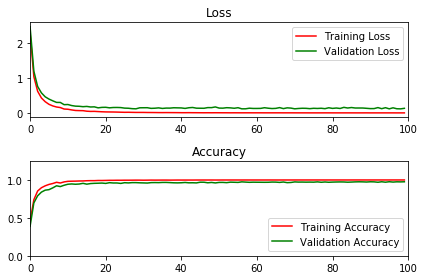

In [21]:
# Train and validate our model
from sklearn.utils import shuffle
epochs = []
train_loss = []
valid_loss = []
train_accuracy = []
valid_accuracy = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # initialize the tensor variables. 
    num_examples = len(X_train) # number of examples in the training data
    
    # shuffle training data
    # its important to shuffle the training data otherwise the ordering of data might have huge effect on how well the model trains
    X_train, y_train = shuffle(X_train, y_train)

    
    print("Training...")
    print()
    max_accuracy = 0
    for i in range(EPOCHS): # train the model for EPOCHS number of iterations
        total_accuracy = 0
        total_loss = 0
        X_train, y_train = shuffle(X_train, y_train) # shuffle the training data to ensure that our training isn't biased by the
        # order of the images. 
        
        # now we break up our training data into batches and train the model on each batch 
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation,feed_dict={x: batch_x, y: batch_y, dropout: 0.5})

          
        # at the end of each epoch, we evaluate the model on our validation data 
        training_loss, training_accuracy = evaluate(X_train, y_train, 1.0)
        validation_loss, validation_accuracy = evaluate(X_valid, y_valid, 1.0)
        print("EPOCH {} ...".format(i+1))
        print("Training Loss = {:.3f}".format(training_loss))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()
        print("Validation Loss = {:.3f}".format(validation_loss))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        epochs.append(i)
        train_loss.append(training_loss)
        valid_loss.append(validation_loss)
        train_accuracy.append(training_accuracy)
        valid_accuracy.append(validation_accuracy)
        if max_accuracy < validation_accuracy: # we save the model having maximum accuracy on validation data
            max_accuracy = validation_accuracy # so, we can load up later and modify it or evaluate the model on test dataset
            saver.save(sess, './lenet.ckpt')
            print("Model saved")
        print()
        print()

loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(epochs, train_loss, 'r', label='Training Loss')
loss_plot.plot(epochs, valid_loss, 'g', label='Validation Loss')
loss_plot.set_xlim([epochs[0], epochs[-1] + 1])
loss_plot.legend(loc=1)
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(epochs, train_accuracy, 'r', label='Training Accuracy')
acc_plot.plot(epochs, valid_accuracy, 'g', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.25])
acc_plot.set_xlim([epochs[0], epochs[-1] + 1])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()

In [22]:
# print validation accuracy 
print("Validation Accuracy = {:.3f}".format(max_accuracy))

Validation Accuracy = 0.977


### Load Best Model and Test 

In [23]:
save_file = './lenet.ckpt'
with tf.Session() as sess:
    saver.restore(sess, save_file)
    accuracy = sess.run(accuracy_operation, feed_dict={x: X_test, y: y_test, dropout: 1.0})

print('Test Accuracy = {:.3f}'.format(accuracy))


INFO:tensorflow:Restoring parameters from ./lenet.ckpt
Test Accuracy = 0.954


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [21]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

input = 'test_images/*.png'

name = glob.glob(input)
X_new = np.zeros([len(name), 32, 32, 3])
y_new = np.zeros(len(name))
i = 0
for image in name:  
    print(image)
    img_name = image.split('_')[2] 
    label = img_name.split('.')[0] 
    y_new[i] = np.int_(label)
    img = mpimg.imread(image)
    print(img.shape)
    #X_new[i] = img
    #i += 1

#y_new = np.int_(y_new)   
#X_new = np.int_(X_new)
#for x in X_new:
#    plt.imshow(x)
#    plt.show()

test_images/label_14.png
(80, 80, 3)


### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")